In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import df_helpers as helper
from matplotlib import pyplot as plt
import seaborn as sns
import df_helpers as helper
dirs = helper.dirs()
import os

### Get data

In [10]:
metadata_df = helper.read_metadata()
normcounts_df = helper.read_normcounts().T
log2normcounts_df = (normcounts_df+1).apply(np.log2)
#Kegg Geneset
cytoKEGG = helper.get_cytoKEGGlist()
len(cytoKEGG)


213

In [14]:
sigs = helper.read_sigs('Up','D100')
sigs[sigs['Unnamed: 0'].isin(cytoKEGG)].shape

(54, 7)

In [4]:
validlist = [gene for gene in cytoKEGG if gene not in ['BDKRB1', 'BDKRB2', 'CD14', 'CHRM1', 'CHRM2', 'CHRM4', 'CHRM5', 'FGF10', 'FGF14', 'FGF20', 'FGF21', 'FGF23', 'FGF3', 'FGF5', 'FGF6', 'FGF7', 'FGF9', 'INS', 'INSRR', 'ITGA10', 'ITGA4', 'ITGA8', 'ITGAD', 'ITGB3', 'ITGB6', 'ITGB7', 'MOS', 'MYL10', 'MYL2', 'NCKAP1L', 'PAK5', 'PFN3', 'PFN4', 'PIK3CG', 'SCIN', 'TMSB4XP8', 'WAS']]
res = helper.read_results(updown=None,contrast='D100')
res.loc[validlist].sort_values(by='padj')

cytolog2normcounts_df = log2normcounts_df[validlist]
 


Symbol,ABI2,ACTB,ACTG1,ACTN1,ACTN2,ACTN3,ACTN4,APC,APC2,ARAF,...,TIAM2,TMSB4X,TMSB4Y,VAV1,VAV2,VAV3,VCL,WASF1,WASF2,WASL
A0,9.224961,13.923517,14.152296,10.206663,1.743015,4.305877,12.094381,9.427880,6.456996,8.718272,...,9.241840,6.858225,3.798089,6.585973,10.316966,3.798089,11.885149,5.510945,9.199267,10.898894
A1,9.570593,14.113375,13.945338,10.827641,1.097761,4.266304,12.152168,9.499649,5.740125,8.412724,...,8.131109,6.274167,4.349350,6.186541,9.922123,5.041166,12.044136,5.470162,9.249680,10.438284
A2,9.944971,13.991599,13.836323,10.899843,3.567596,4.757844,12.159837,9.557175,7.060136,8.146017,...,8.252569,6.364977,4.017831,6.246204,9.553011,5.508153,11.857873,5.508153,9.514983,10.278319
A3,10.398420,14.258397,14.193207,11.177065,3.753598,5.009878,12.565286,9.617759,6.396655,8.500283,...,8.286132,7.165617,4.699101,6.304687,9.543252,6.185979,11.922059,5.889402,10.064474,10.221102
A7,10.350990,14.996672,15.284189,12.644249,4.372294,4.220001,12.730901,9.991025,5.884946,7.879288,...,8.645291,9.590117,5.666617,5.575400,9.324348,7.637660,13.676160,7.202350,9.834269,10.274512
A10,10.695612,15.126789,15.263533,12.316121,4.524762,5.045611,12.392767,10.197241,6.109761,7.834139,...,8.663030,10.037427,6.286641,5.615939,9.145911,7.896067,13.872486,7.827798,9.615963,9.868532
C0,9.278087,13.913523,14.075671,10.331724,2.147591,4.771006,12.192159,9.253969,7.122864,8.510457,...,9.184779,6.097480,2.974849,6.320305,10.467262,4.431973,11.697376,5.141953,9.497107,10.798050
C1,9.463860,13.922751,14.414922,10.801648,2.773459,4.858964,12.418431,9.456686,6.449467,8.465901,...,7.880597,6.027065,3.000891,6.836007,9.823057,5.427259,12.029097,5.503496,9.294488,10.233039
C2,10.017655,13.669402,13.850132,10.759231,4.292093,5.295534,12.290777,9.514720,7.161523,8.263029,...,8.088548,6.431260,4.121307,6.375345,9.402638,5.585666,11.556834,5.618150,9.610669,9.860216
C3,10.412251,14.061559,14.180990,11.117127,4.844330,5.037144,12.430637,9.589023,7.015306,8.400155,...,8.060549,6.545706,3.942693,6.395417,9.328285,6.395417,11.642868,6.015006,9.793170,10.184225


[0.57989821 0.17236081 0.07639961 0.05953384 0.02338916 0.01569626
 0.01120628 0.00660608 0.00618937]


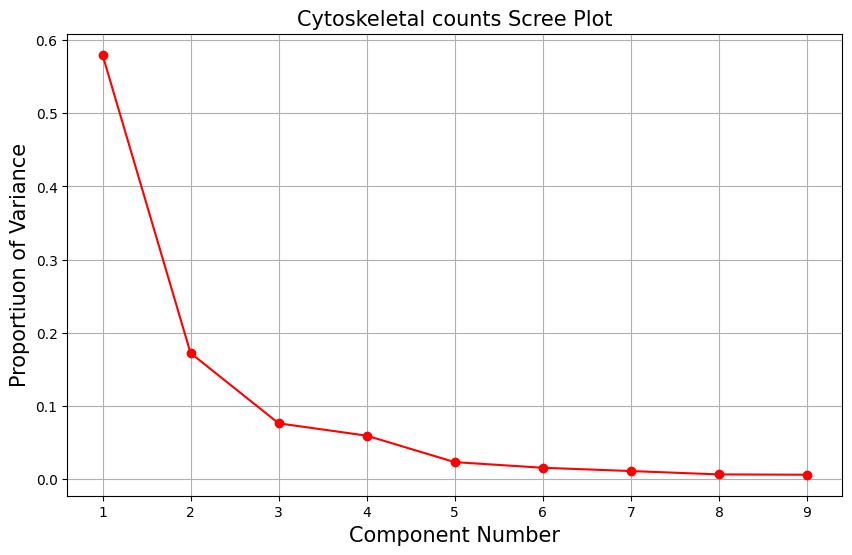

In [12]:

## Find component variance contributions
dim_pca = len(cytolog2normcounts_df.columns.to_list())
pca = PCA(n_components=9)
pca_trans = pca.fit_transform(cytolog2normcounts_df)
prop_var = pca.explained_variance_ratio_
pc_number = np.arange(9) + 1

plt.figure(figsize=(10,6))
plt.plot(pc_number,prop_var,'ro-')
plt.title('Cytoskeletal counts Scree Plot', fontsize=15)
plt.xlabel('Component Number',fontsize=15)
plt.ylabel('Proportiuon of Variance',fontsize=15)
plt.grid()
plt.savefig(f'{dirs.pcaplots}/Cytoskeletal counts Scree Plot',dpi=300)
print(prop_var)

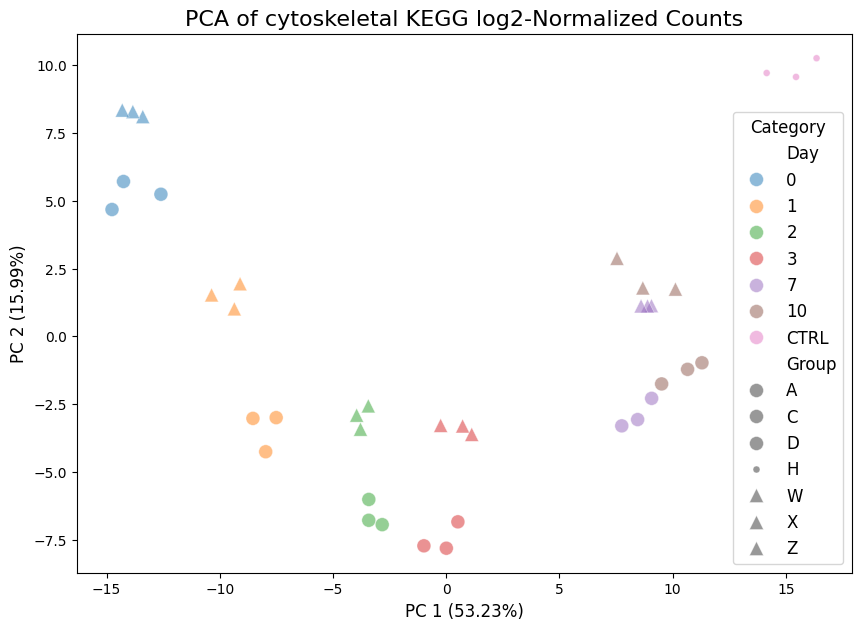

In [36]:
## perform PCA using first 2 components
pca = PCA(n_components=2) 
pca_trans = pca.fit_transform(cytolog2normcounts_df)
pc1var,pc2var = pca.explained_variance_ratio_[:2] # For plot Axis Labels
pca_df = pd.DataFrame(data=pca_trans, columns=['PC1', 'PC2'], index=normcounts_df.index)
pca_df = pca_df.merge(metadata_df, left_index=True, right_index=True) #For seaborn markers


## Plotting with seaborn
plt.figure(figsize=(10, 7))
# color_map = {0: '#000080', 1: '#100080', 2: '#200080',3: '#300080',7: '#700080',10: '#1000080'}
#  palette=color_map,
marker_map = {'A': 'o', 'C': 'o', 'D': 'o','W': '^', 'X': '^', 'Z': '^','H':'.'}

sns.scatterplot(x='PC1', y='PC2', hue='Day', data=pca_df, style='Group', markers=marker_map,
                alpha=0.5, s=100, linewidth=0.5, legend='full')
plt.title('PCA of cytoskeletal KEGG log2-Normalized Counts', fontsize=16)
plt.xlabel(f'PC 1 ({round(100*pc1var,2)}%)', fontsize=12)
plt.ylabel(f'PC 2 ({round(100*pc2var,2)}%)', fontsize=12)
plt.legend(title='Category',title_fontsize = 12,fontsize=12)
plt.savefig(f'{dirs.pcaplots}/PCA cyto',dpi=300)

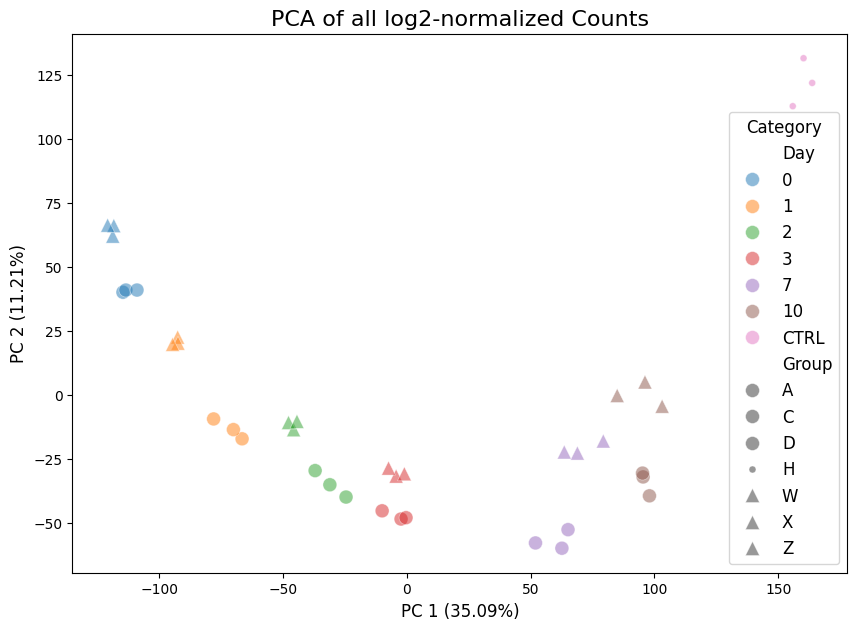

In [35]:
## perform PCA using first 2 components
pca = PCA(n_components=2) 
pca_trans = pca.fit_transform(log2normcounts_df)
pc1var,pc2var = pca.explained_variance_ratio_[:2] # For plot Axis Labels
pca_df = pd.DataFrame(data=pca_trans, columns=['PC1', 'PC2'], index=normcounts_df.index)
pca_df = pca_df.merge(metadata_df, left_index=True, right_index=True) #For seaborn markers


## Plotting with seaborn
plt.figure(figsize=(10, 7))
# color_map = {0: '#000080', 1: '#100080', 2: '#200080',3: '#300080',7: '#700080',10: '#1000080'}
#  palette=color_map,
marker_map = {'A': 'o', 'C': 'o', 'D': 'o','W': '^', 'X': '^', 'Z': '^','H':'.'}

sns.scatterplot(x='PC1', y='PC2', hue='Day', data=pca_df, style='Group', markers=marker_map,
                alpha=0.5, s=100, linewidth=0.5, legend='full')
plt.title('PCA of all log2-normalized Counts', fontsize=16)
plt.xlabel(f'PC 1 ({round(100*pc1var,2)}%)', fontsize=12)
plt.ylabel(f'PC 2 ({round(100*pc2var,2)}%)', fontsize=12)
plt.legend(title='Category',title_fontsize = 12,fontsize=12)
plt.savefig(f'{dirs.pcaplots}/PCA all',dpi=300)

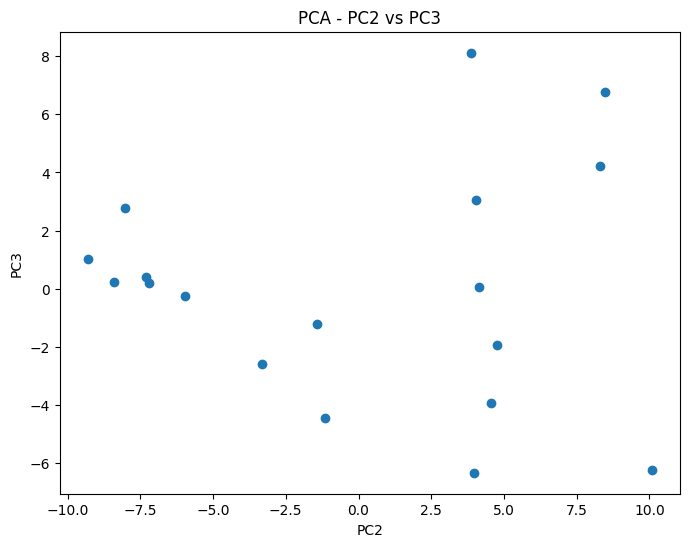

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pca_trans = scaler.fit_transform(cytolog2normcounts_df)
pca = PCA()
X_pca = pca.fit_transform(pca_trans)
PC2 = X_pca[:, 1]
PC3 = X_pca[:, 2]
plt.figure(figsize=(8, 6))
plt.scatter(PC2, PC3)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PCA - PC2 vs PC3')
plt.show()
# pca_df = pd.DataFrame(data=pca_trans, columns=['PC2', 'PC3'], index=normcounts_df.index)

/var/folders/_n/8ws9lxds3kdcgdlbxz8mr0g00000gn/T/ipykernel_47707/2160935437.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],


<Figure size 1000x700 with 0 Axes>

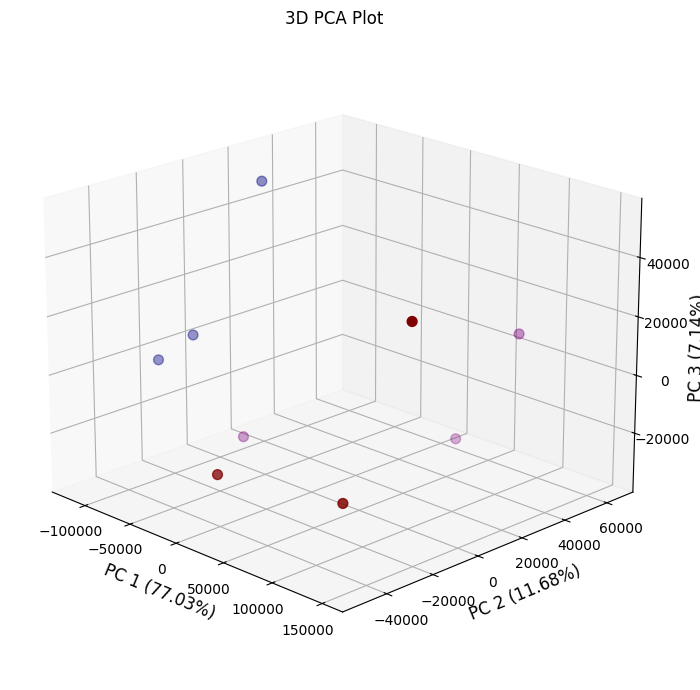

In [139]:
pca = PCA(n_components=3)
pca_trans = pca.fit_transform(norm_counts_df)
pc1var,pc2var,pc3var = pca.explained_variance_ratio_[:3]
pca_df = pd.DataFrame(data=pca_trans, columns=['PC1', 'PC2', 'PC3'], index=norm_counts_df.index)
pca_df = pca_df.merge(metadata_df, left_index=True, right_index=True)


# # Plotting with seaborn
plt.figure(figsize=(10, 7))
color_map = {'D3': '#000080', 'D5': '#800080', 'D7': '#800000'}
sample_colors = pca_df['Day'].map(color_map)


# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each sample, optionally color-coding by category
# Assuming 'category_series' maps samples to categories
# If you don't have categories, you can omit 'c' and 'cmap'
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
           c=sample_colors, cmap='viridis', s=50)

ax.set_xlabel(f'PC 1 ({round(100*pc1var,2)}%)', fontsize=12)
ax.set_ylabel(f'PC 2 ({round(100*pc2var,2)}%)', fontsize=12)
ax.set_zlabel(f'PC 3 ({round(100*pc3var,2)}%)', fontsize=12)
plt.title('3D PCA Plot')


# Show plot
# plt.show()

ax.view_init(elev=90, azim=-90)
plt.savefig(f'{pcaplots}/3D PCA (PC1-2)')
ax.view_init(elev=0, azim=-90)
plt.savefig(f'{pcaplots}/3D PCA (PC1-3)')
ax.view_init(elev=0, azim=0)
plt.savefig(f'{pcaplots}/3D PCA (PC2-3)')
ax.view_init(elev=20, azim=-45)
plt.savefig(f'{pcaplots}/3D PCA')

In [9]:

# Plotting density distribution for all samples
plt.figure(figsize=(10, 6))
# for column in TPM_df.columns:
temp = (TPM_df[0]+1).map(np.log2)
sns.kdeplot(temp, bw_adjust=0.5)

plt.title('TPM Density Distribution')
plt.xlabel('TPM')
plt.ylabel('Density')
plt.legend(title='Samples')
plt.show()

KeyError: 0

<Figure size 1000x600 with 0 Axes>